In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('forumpage views.csv', index_col = 'date', parse_dates = ['date'])
df = df[(df["value"] >= df["value"].quantile(0.025)) & (df["value"] <= df["value"].quantile(0.975))]


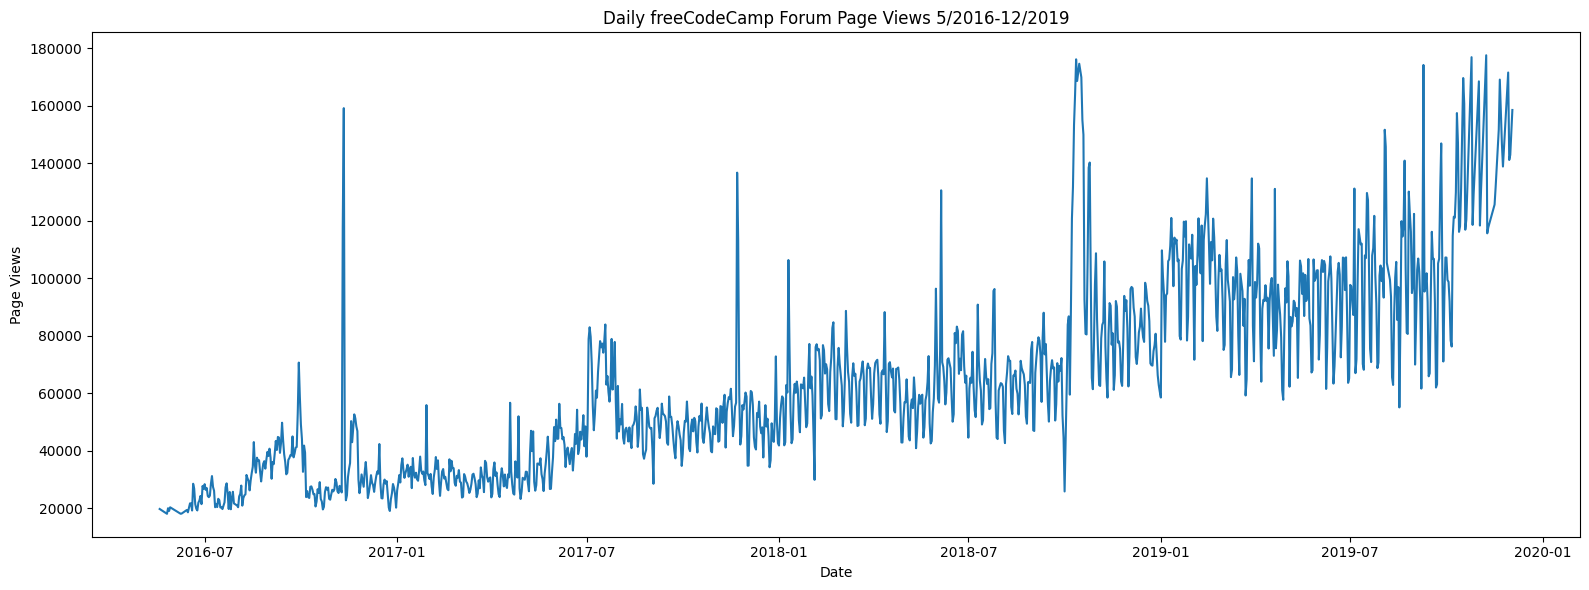

In [2]:
def draw_line_plot():
    plt.figure(figsize = (16, 6))
    sns.lineplot(data = df, x = df.index, y = "value")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.tight_layout()
    plt.show()

draw_line_plot()

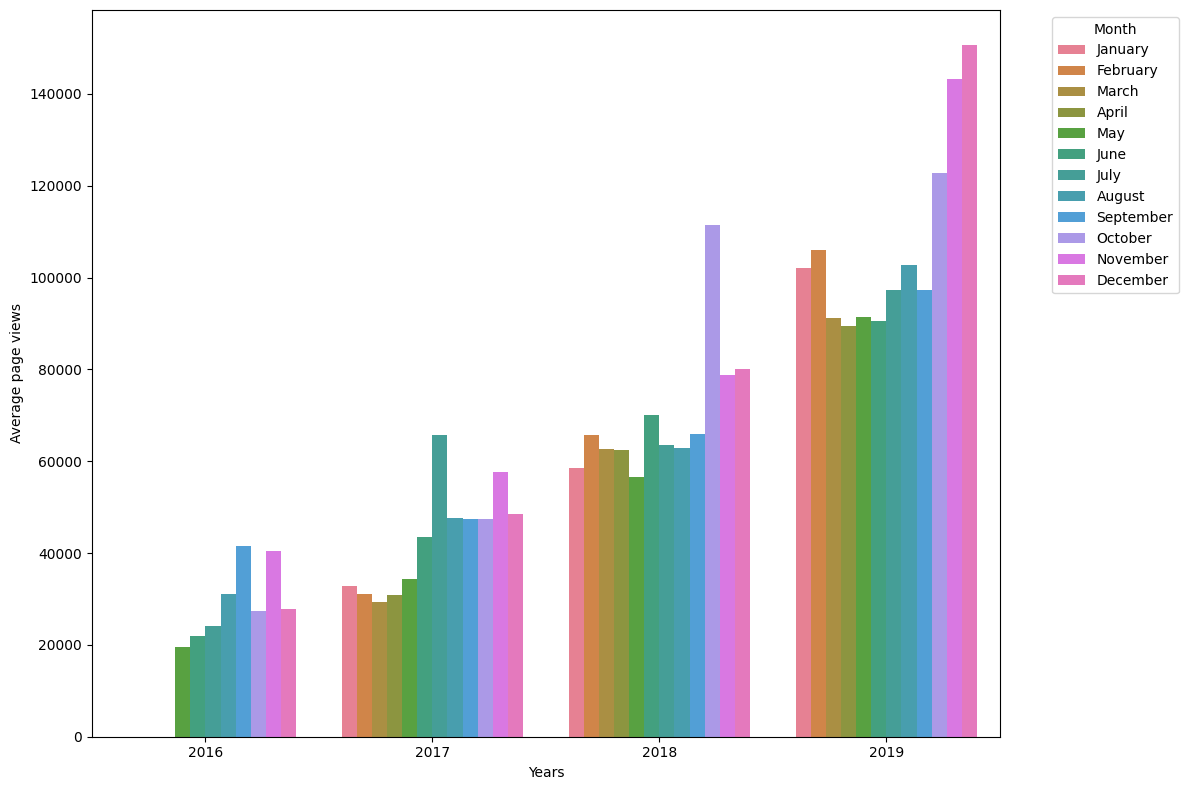

In [ ]:
def draw_bar_plot():
    # Prepare data
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.strftime('%B')
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean().reset_index()

    # Ensure months are in correct order
    months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                    'July', 'August', 'September', 'October', 'November', 'December']
    df_bar['month'] = pd.Categorical(df_bar['month'], categories=months_order, ordered=True)
    df_bar = df_bar.sort_values(['year', 'month'])

    plt.figure(figsize = (12, 8))
    sns.barplot(data = df_bar, x = 'year', y = 'value', hue = 'month')
    plt.xlabel('Years')
    plt.ylabel('Average page views')
    plt.legend(title = 'Month', bbox_to_anchor = (1.05, 1), loc = 'upper left')
    plt.tight_layout()
    plt.show()

draw_bar_plot()

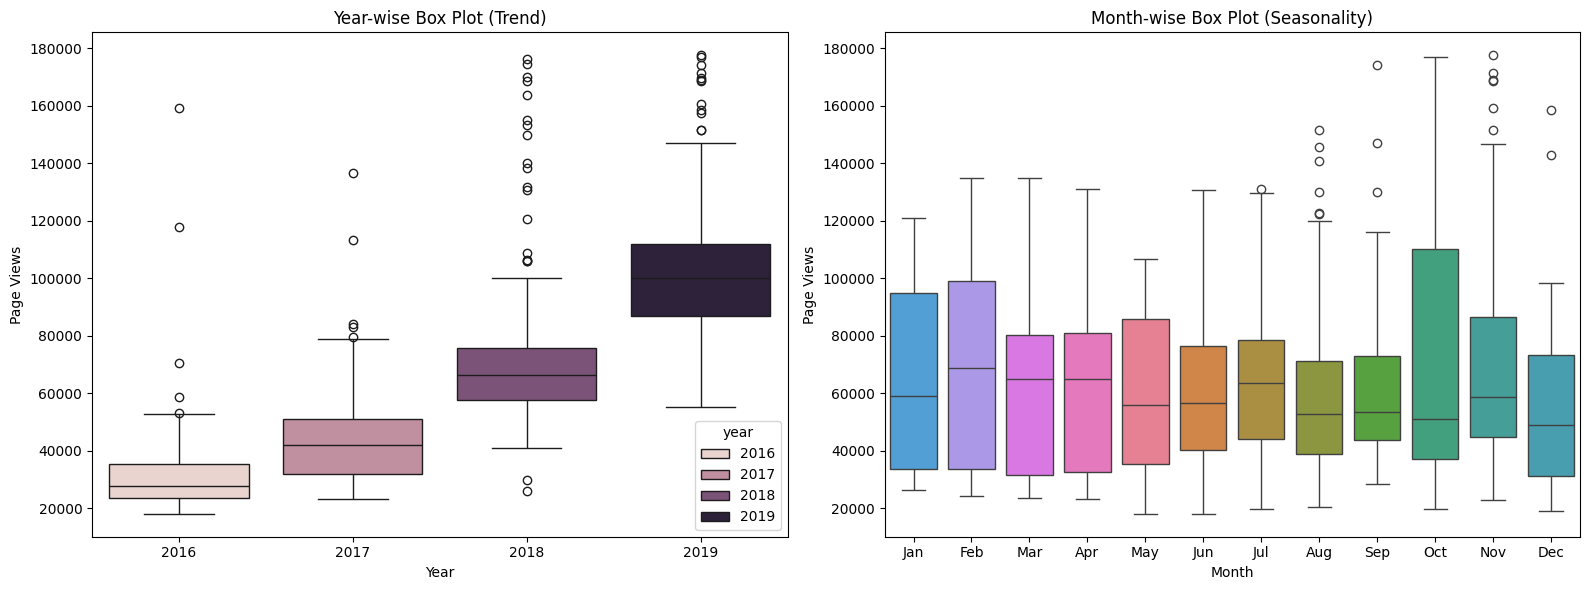

In [ ]:
def draw_box_plot():
    df_box = df.copy().rename(columns={"value": "views"})
    df_box.reset_index(inplace=True)
    df_box["year"] = df_box["date"].dt.year
    df_box["month"] = df_box["date"].dt.strftime("%b")
    months_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

    fig, axes = plt.subplots(1, 2, figsize = (16, 6))

    sns.boxplot(ax = axes[0], data = df_box, x = "year", y = "views", hue = "year")
    axes[0].set_title("Year-wise Box Plot (Trend)")
    axes[0].set_xlabel("Year")
    axes[0].set_ylabel("Page Views")

    sns.boxplot(ax = axes[1], data = df_box, x = "month", y = "views", order = months_order, hue = "month")
    axes[1].set_title("Month-wise Box Plot (Seasonality)")
    axes[1].set_xlabel("Month")
    axes[1].set_ylabel("Page Views")

    plt.tight_layout()
    plt.show()

draw_box_plot()